#  <font color='red'>Setup Colab Environment</font>

In [ ]:
import pandas as pd
import numpy as np
import requests
import statistics
import itertools
import os
import sys
from prettytable import PrettyTable
import pickle
import multiprocessing
from multiprocessing.pool import ThreadPool
from tqdm import tqdm_notebook
print(multiprocessing.cpu_count()," CPU cores")

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False

from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

from PIL import Image
import skimage.io
import cv2

import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from keras import optimizers,Model,Sequential
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation,BatchNormalization,GlobalMaxPooling2D,concatenate,Flatten,MaxPooling2D
from keras.callbacks.callbacks import EarlyStopping,ReduceLROnPlateau,Callback
from keras.initializers import random_normal
from keras.models import load_model
from keras.losses import binary_crossentropy,categorical_crossentropy,mean_squared_error
from keras import backend as K

import tensorflow as tf
#import shap

# Colab Libs...
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

2  CPU cores


In [ ]:
# Importing Libraries
#ref - https://buomsoo-kim.github.io/colab/2018/04/16/Importing-files-from-Google-Drive-in-Google-Colab.md/

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/Fynd_challenge')
print("We are currently in the folder of ",os.getcwd())

We are currently in the folder of  /content/gdrive/My Drive/Fynd_challenge


In [ ]:
#from google.colab import files
#files.download('model3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  <font color='red'>EDA on data and visualize sample images</font>

In [ ]:
df = pd.read_csv('fynd_data.csv')
print(df.shape)
df.head(4)

(2156, 7)


id  ...   class
0  3213e9e9da734c268db6bed4b76ea411.jpg  ...  zipper
1  3a4e9c2704bb46afb5a43c3231974e04.jpg  ...  zipper
2  48d93cb06ede452fbab83495a4ff17a6.jpg  ...  zipper
3  c7d91a112c6341eb84ed8e62ea4d6aa8.jpg  ...  zipper

[4 rows x 7 columns]

In [ ]:
df.isnull().sum()

id         0
view_1     0
view_2     1
view_3     5
view_4     6
view_5    37
class      0
dtype: int64

In [ ]:
df = df.dropna()
print(df.shape)

(2113, 7)


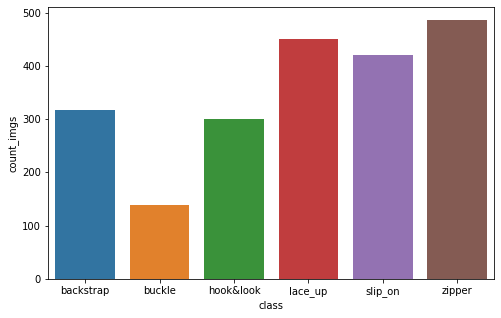

In [ ]:
df_grp = pd.DataFrame(df.groupby('class').size()).reset_index()
df_grp.columns  = ['class','count_imgs']
plt.figure(figsize = (8,5))
sns.barplot(x = 'class',y = 'count_imgs',data = df_grp)
plt.show()

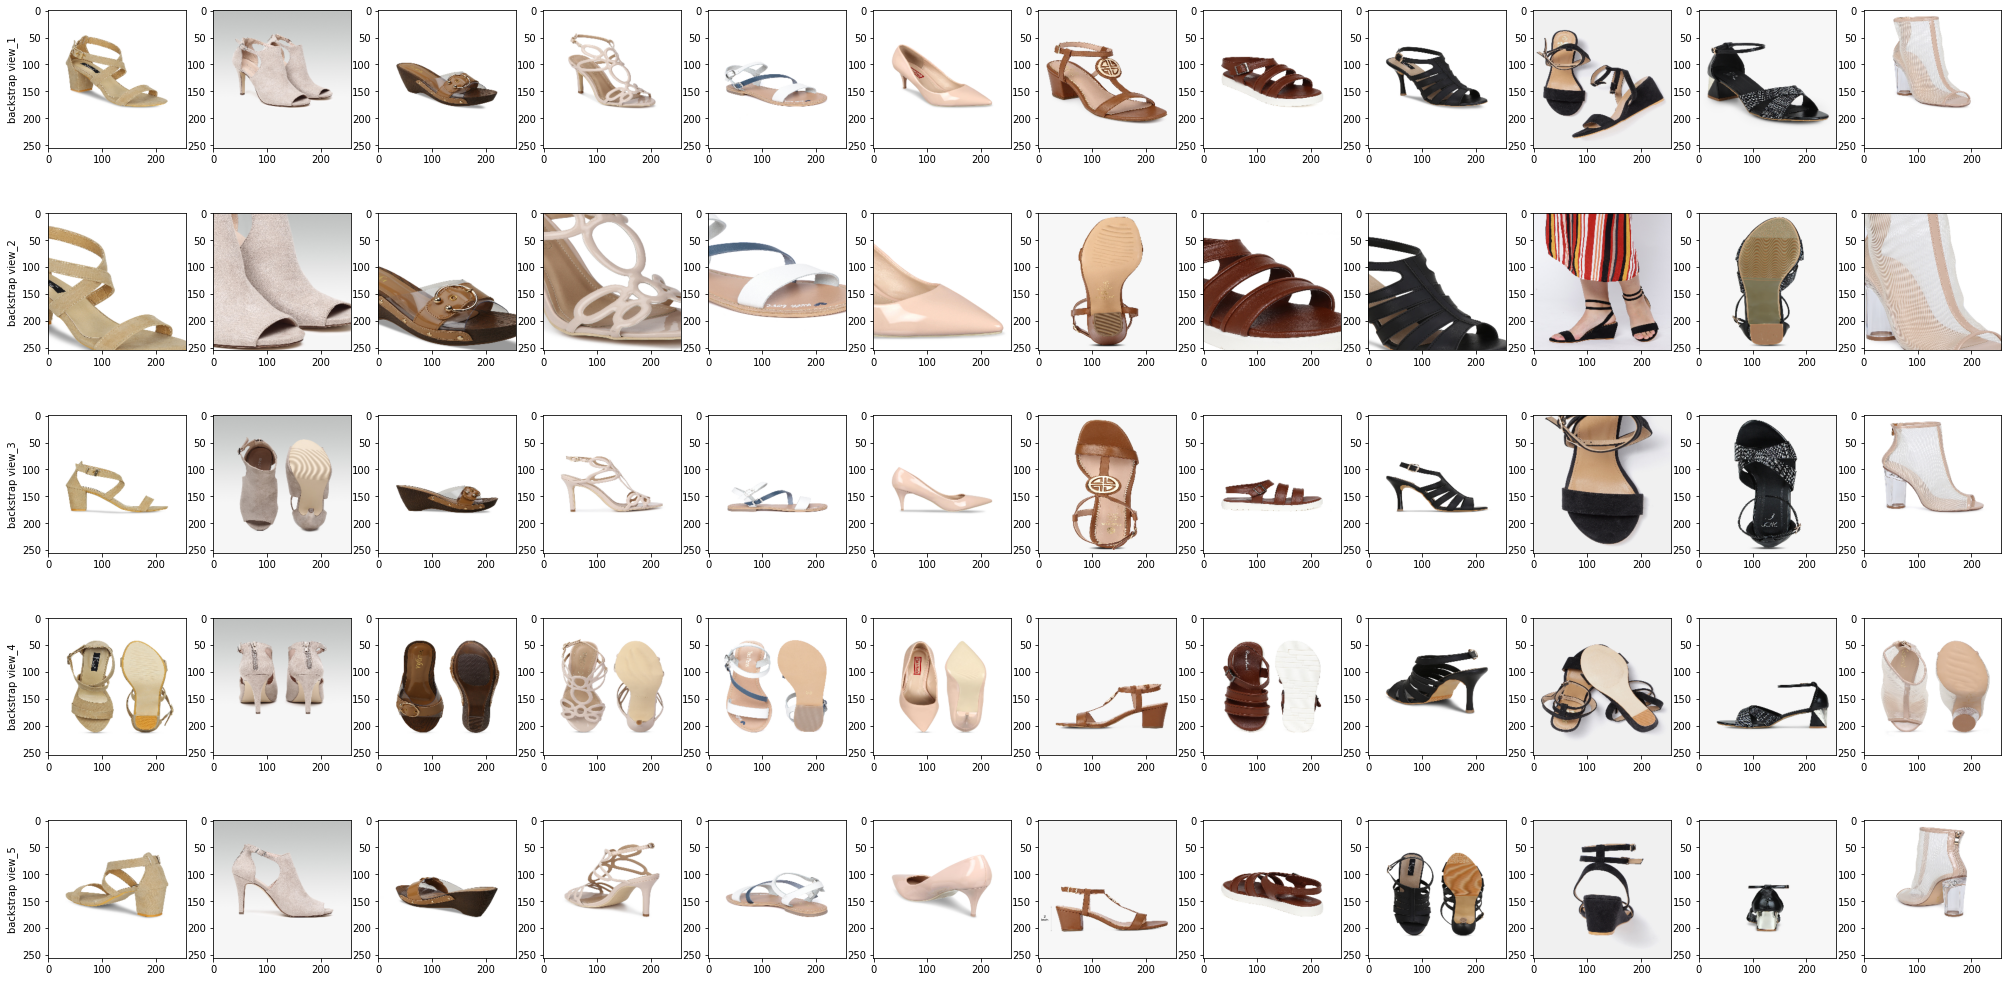

In [ ]:
f, axarr = plt.subplots(5,12,figsize = (35,18))

for view in range(1,6):
  colname = "view_" + str(view)
  axarr[view-1][0].set_ylabel("backstrap " + colname)
  for i in range(12):
    df_temp = df[df['class'] == 'backstrap']
    try:
      img = cv2.resize(skimage.io.imread(df_temp[colname].iloc[i]),(256,256))
    except:
      continue
    axarr[view-1][i].imshow(img)

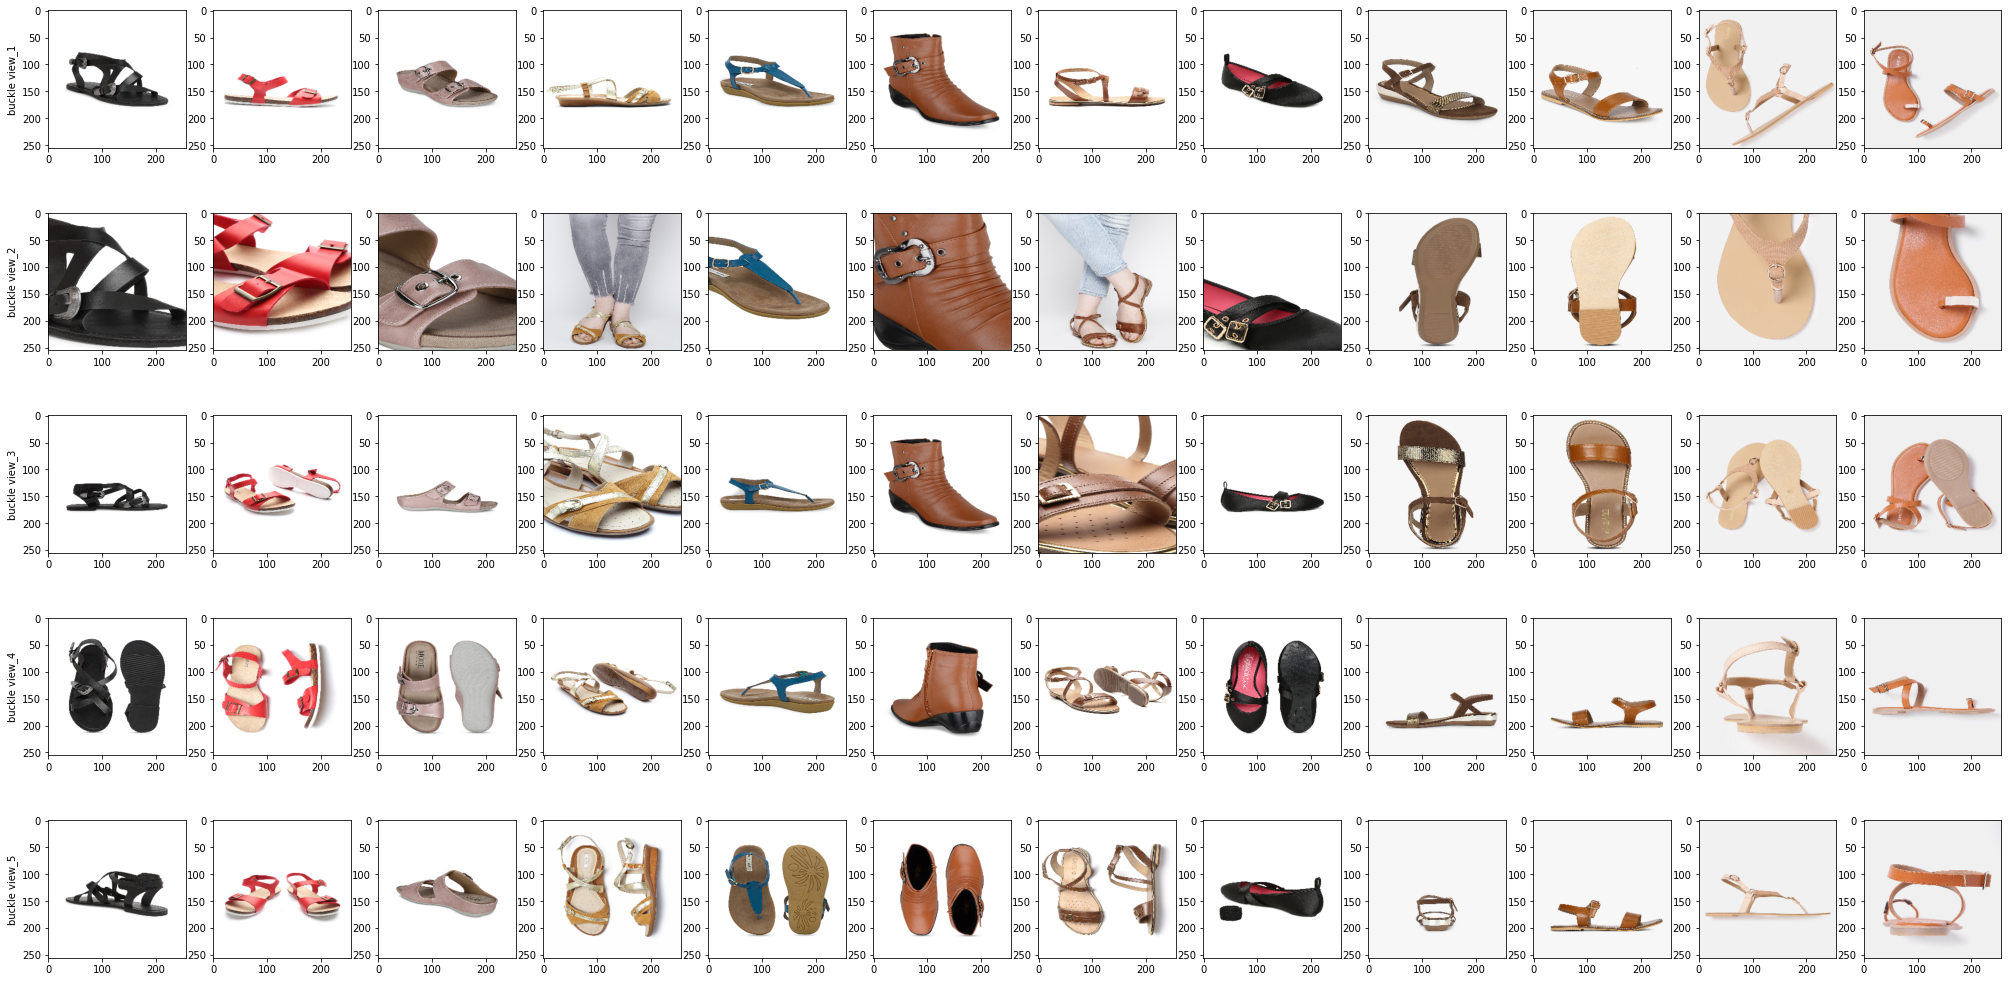

In [ ]:
f, axarr = plt.subplots(5,12,figsize = (35,18))
for view in range(1,6):
  colname = "view_" + str(view)
  axarr[view-1][0].set_ylabel("buckle " + colname)
  for i in range(12):
    df_temp = df[df['class'] == 'buckle']
    try:
      img = cv2.resize(skimage.io.imread(df_temp[colname].iloc[i]),(256,256))
    except:
      continue
    axarr[view-1][i].imshow(img)

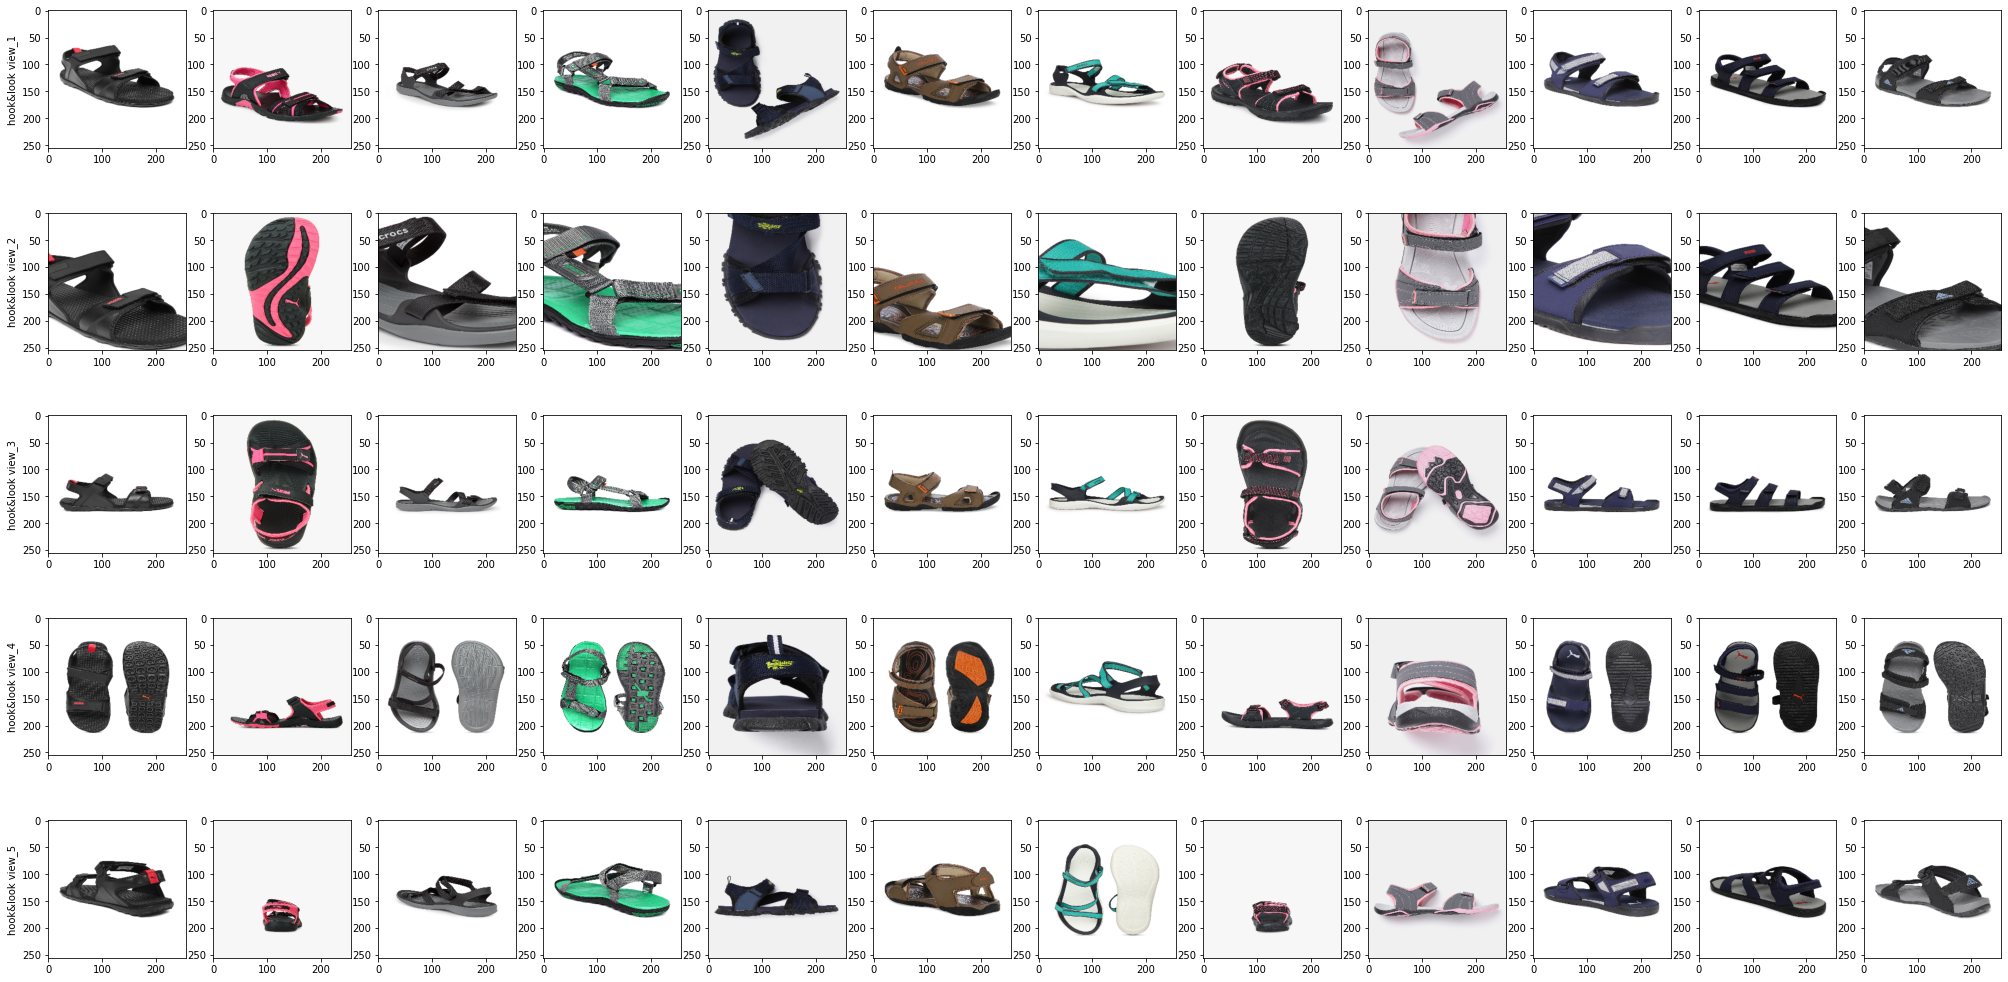

In [ ]:
f, axarr = plt.subplots(5,12,figsize = (35,18))
for view in range(1,6):
  colname = "view_" + str(view)
  axarr[view-1][0].set_ylabel("hook&look " + colname)
  for i in range(12):
    df_temp = df[df['class'] == 'hook&look']
    try:
      img = cv2.resize(skimage.io.imread(df_temp[colname].iloc[i]),(256,256))
    except:
      continue
    axarr[view-1][i].imshow(img)

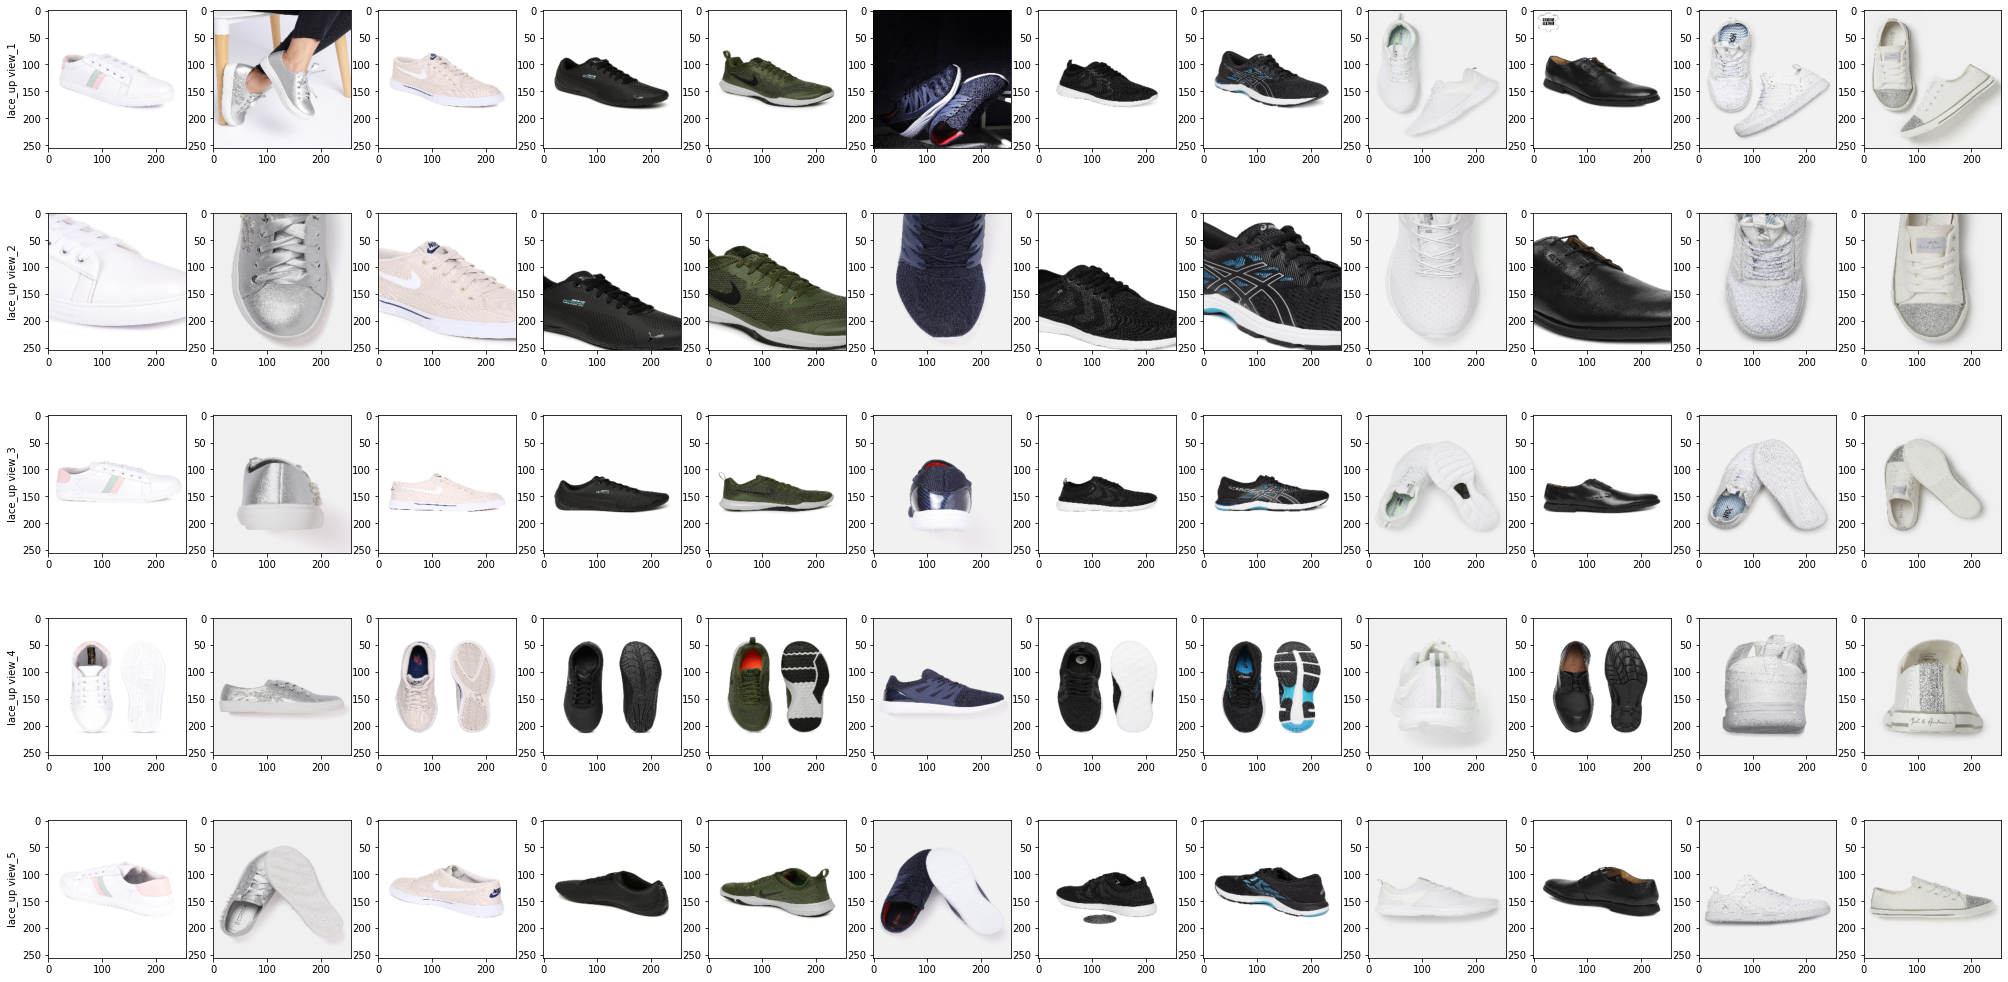

In [ ]:
f, axarr = plt.subplots(5,12,figsize = (35,18))
for view in range(1,6):
  colname = "view_" + str(view)
  axarr[view-1][0].set_ylabel("lace_up " + colname)
  for i in range(12):
    df_temp = df[df['class'] == 'lace_up']
    try:
      img = cv2.resize(skimage.io.imread(df_temp[colname].iloc[i]),(256,256))
    except:
      continue
    axarr[view-1][i].imshow(img)

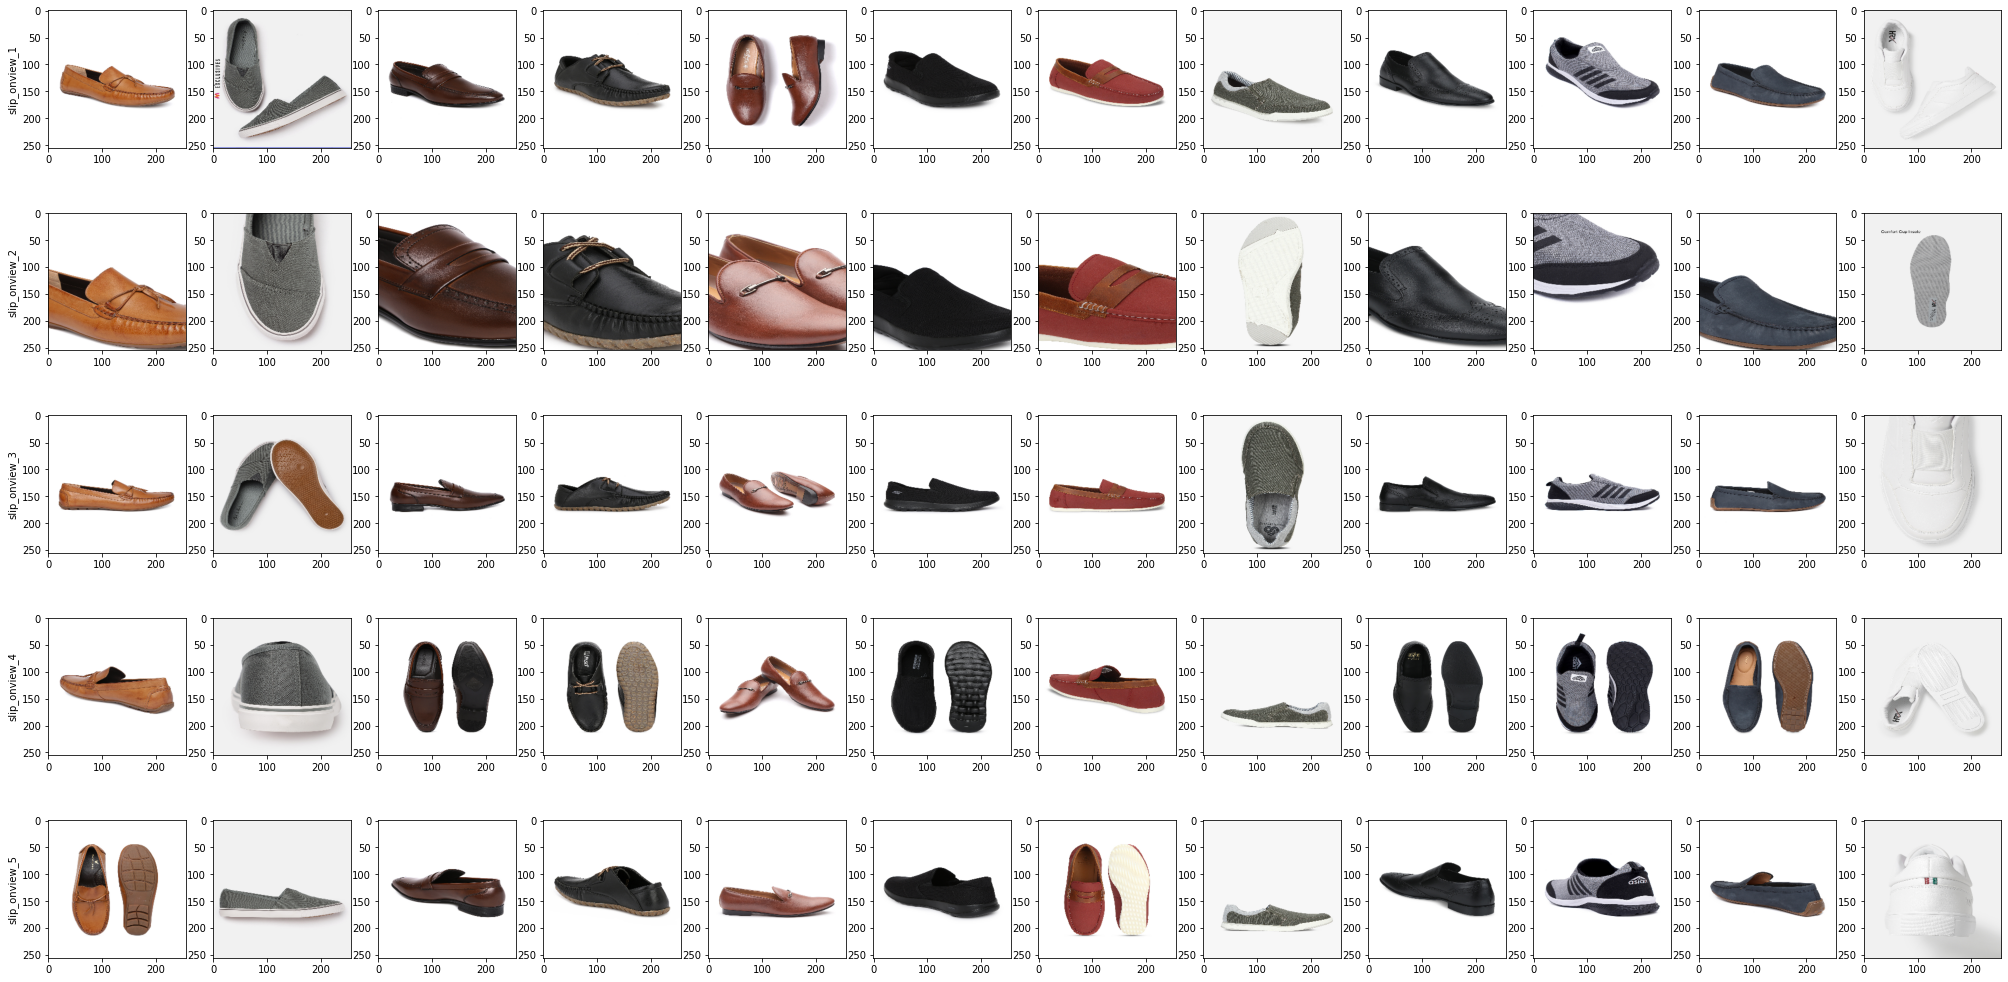

In [ ]:
f, axarr = plt.subplots(5,12,figsize = (35,18))
for view in range(1,6):
  colname = "view_" + str(view)
  axarr[view-1][0].set_ylabel("slip_on" + colname)
  for i in range(12):
    df_temp = df[df['class'] == 'slip_on']
    try:
      img = cv2.resize(skimage.io.imread(df_temp[colname].iloc[i]),(256,256))
    except:
      continue
    axarr[view-1][i].imshow(img)

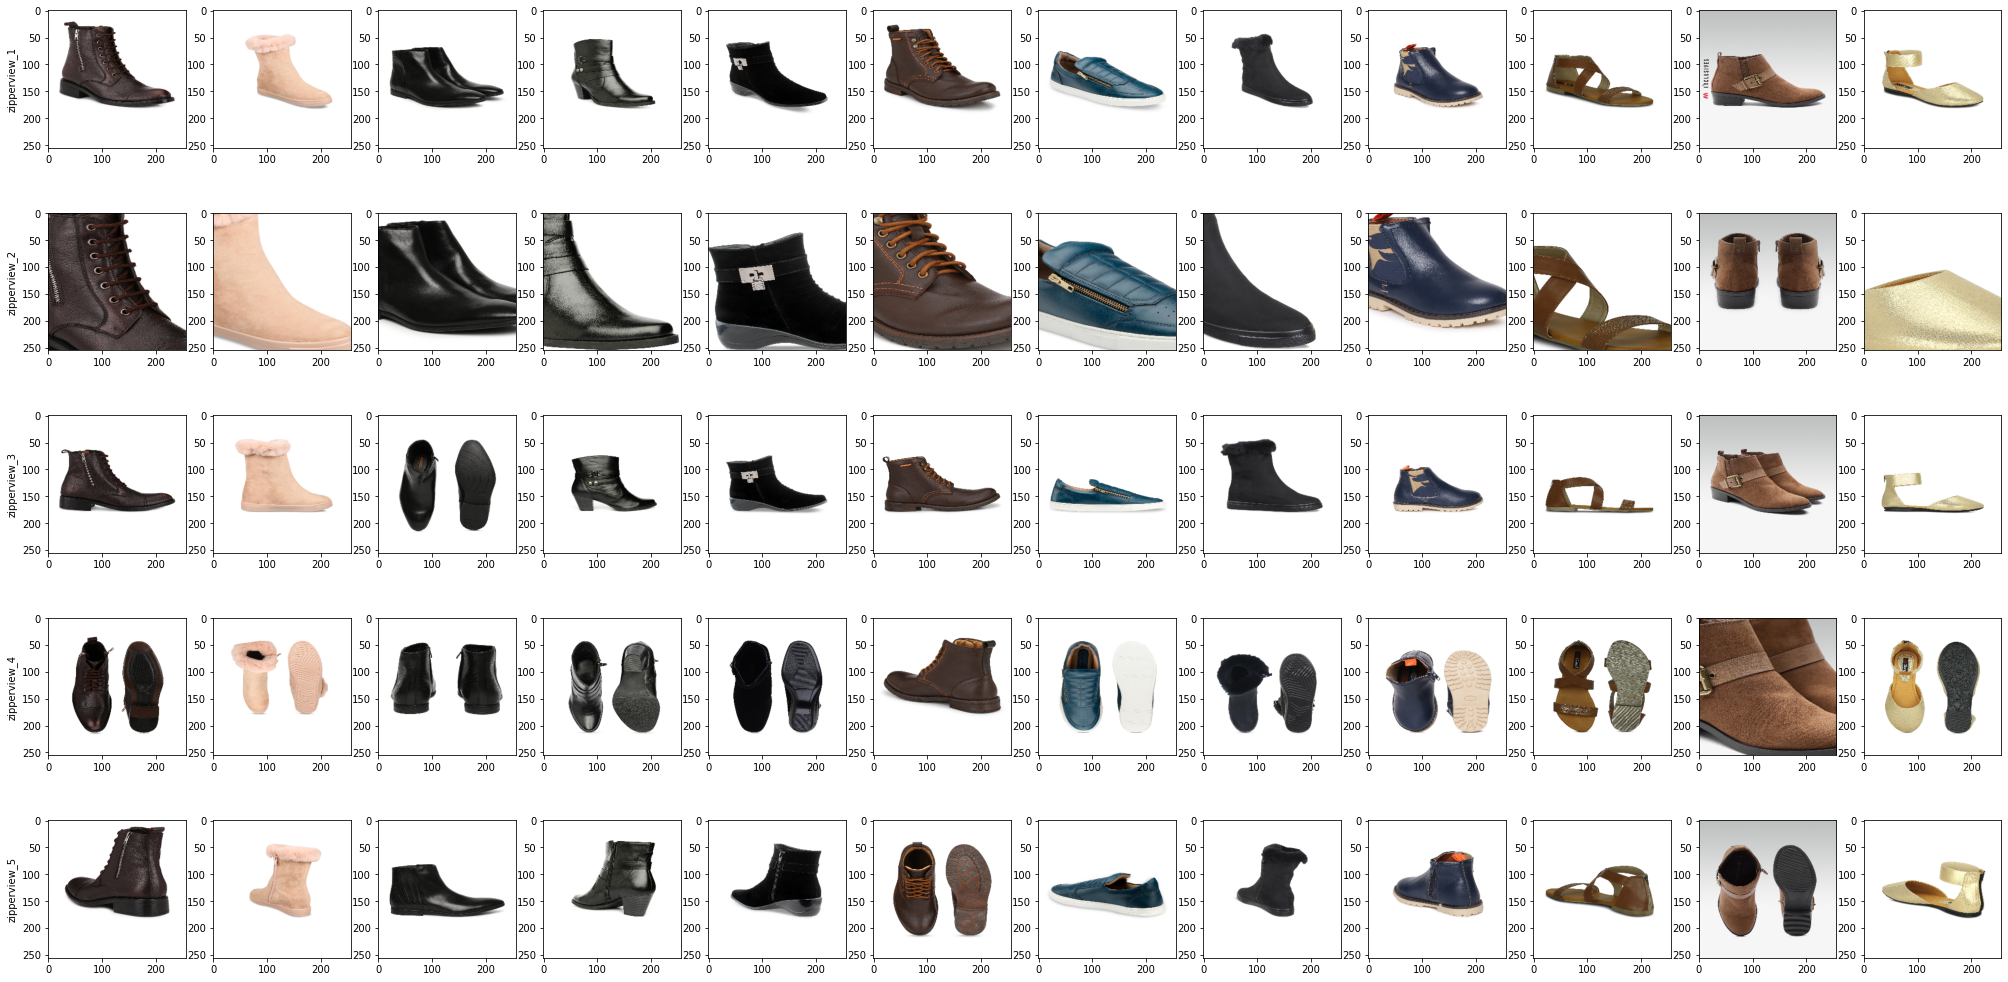

In [ ]:
f, axarr = plt.subplots(5,12,figsize = (35,18))
for view in range(1,6):
  colname = "view_" + str(view)
  axarr[view-1][0].set_ylabel("zipper" + colname)
  for i in range(12):
    df_temp = df[df['class'] == 'zipper']
    try:
      img = cv2.resize(skimage.io.imread(df_temp[colname].iloc[i]),(256,256))
    except:
      continue
    axarr[view-1][i].imshow(img)

#  <font color='red'>Train test split</font>

In [ ]:
df_output_encodings = pd.read_csv('df_output_encodings.csv')
df_output_encodings

class  label
0  backstrap      0
1  hook&look      1
2     zipper      2
3    slip_on      3
4    lace_up      4
5     buckle      5

In [ ]:
file = open('df_train', 'rb')
df_train = pickle.load(file)
file.close()

file = open('df_test', 'rb')
df_test = pickle.load(file)
file.close()
print(df_train.shape,df_test.shape)

(1584, 8) (529, 8)


#  <font color='red'>Ensemble of (Model 1+2+3)</font>

In [ ]:
def get_mode(list):
  try:
    return statistics.mode(list)
  except:
    return list[0]

In [ ]:
X_preds_1 = np.load('X_test_1.npz')
X_preds_2 = np.load('X_test_2.npz')
X_preds_3 = np.load('X_test_3.npz')
X_preds_4 = np.load('X_test_4.npz')
X_preds_5 = np.load('X_test_5.npz')

In [ ]:
model1 = load_model('model1.h5')
model2 = load_model('model2.h5')
model3 = load_model('model3.h5')

In [ ]:
df_test['model1_view1_prediction'] = np.argmax(model1.predict(X_preds_1['arr_0'],verbose = 1,batch_size = 1), axis=1)
df_test['model1_view2_prediction'] = np.argmax(model1.predict(X_preds_2['arr_0'],verbose = 1,batch_size = 1), axis=1)
df_test['model1_view3_prediction'] = np.argmax(model1.predict(X_preds_3['arr_0'],verbose = 1,batch_size = 1), axis=1)
df_test['model1_view4_prediction'] = np.argmax(model1.predict(X_preds_4['arr_0'],verbose = 1,batch_size = 1), axis=1)
df_test['model1_view5_prediction'] = np.argmax(model1.predict(X_preds_5['arr_0'],verbose = 1,batch_size = 1), axis=1)

529/529 [==============================] - 8s 15ms/step


In [ ]:
df_test['model2_view1_prediction'] = np.argmax(model2.predict(X_preds_1['arr_0'],verbose = 1,batch_size = 1), axis=1)
df_test['model2_view2_prediction'] = np.argmax(model2.predict(X_preds_2['arr_0'],verbose = 1,batch_size = 1), axis=1)
df_test['model2_view3_prediction'] = np.argmax(model2.predict(X_preds_3['arr_0'],verbose = 1,batch_size = 1), axis=1)
df_test['model2_view4_prediction'] = np.argmax(model2.predict(X_preds_4['arr_0'],verbose = 1,batch_size = 1), axis=1)
df_test['model2_view5_prediction'] = np.argmax(model2.predict(X_preds_5['arr_0'],verbose = 1,batch_size = 1), axis=1)

529/529 [==============================] - 8s 15ms/step


In [ ]:
df_test['model3_prediction'] = np.argmax(model3.predict([X_preds_1['arr_0'],
                                                         X_preds_2['arr_0'],
                                                         X_preds_3['arr_0'],
                                                         X_preds_4['arr_0'],
                                                         X_preds_5['arr_0']],
                                         verbose = 1,
                                         batch_size = 1), 
                                         axis=1)

529/529 [==============================] - 53s 100ms/step


In [ ]:
print("Model1 View1 : %.3f" % accuracy_score(df_test.model1_view1_prediction,df_test.label))
print("Model1 View2 : %.3f" % accuracy_score(df_test.model1_view2_prediction,df_test.label))
print("Model1 View3 : %.3f" % accuracy_score(df_test.model1_view3_prediction,df_test.label))
print("Model1 View4 : %.3f" % accuracy_score(df_test.model1_view4_prediction,df_test.label))
print("Model1 View5 : %.3f" % accuracy_score(df_test.model1_view5_prediction,df_test.label))

print("Model2 View1 : %.3f" % accuracy_score(df_test.model2_view1_prediction,df_test.label))
print("Model2 View2 : %.3f" % accuracy_score(df_test.model2_view2_prediction,df_test.label))
print("Model2 View3 : %.3f" % accuracy_score(df_test.model2_view3_prediction,df_test.label))
print("Model2 View4 : %.3f" % accuracy_score(df_test.model2_view4_prediction,df_test.label))
print("Model2 View5 : %.3f" % accuracy_score(df_test.model2_view5_prediction,df_test.label))

print("Model3 : %.3f" % accuracy_score(df_test.model3_prediction,df_test.label))

print("Ensemble : %.3f" % accuracy_score(df_test.ensemble_prediction,df_test.label))

Model1 View1 : 0.922
Model1 View2 : 0.822
Model1 View3 : 0.888
Model1 View4 : 0.873
Model1 View5 : 0.870
Model2 View1 : 0.713
Model2 View2 : 0.306
Model2 View3 : 0.582
Model2 View4 : 0.457
Model2 View5 : 0.558
Model3 : 0.871
Ensemble : 0.932


In [ ]:
df_test['ensemble_prediction'] = df_test.apply(lambda x: get_mode([x.model1_view1_prediction, 
                                                       x.model1_view2_prediction,
                                                       x.model1_view3_prediction,
                                                       x.model1_view4_prediction,
                                                       x.model1_view5_prediction]), axis=1)

#  <font color='red'>Evaluation Metrics - Final Ensemble Model</font>

In [ ]:
def plot_conf_matrix(true,pred,classes,plot_title):
    cf = confusion_matrix(true, pred)
    
    df_cm = pd.DataFrame(cf, range(len(classes)), range(len(classes)))
    plt.figure(figsize=(8,5.5))
    sns.set(font_scale=1.4)
    ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},xticklabels = classes ,yticklabels = classes,fmt='g')
    ax.set_title(str(plot_title))
    ax.set(xlabel='ACTUAL LABEL', ylabel='PREDICTED LABEL')
    plt.show()

In [ ]:
labels = ['0 - backstrap', '1 - hook&look', '2 - zipper', '3 - slip_on', '4 - lace_up','5 - buckle']

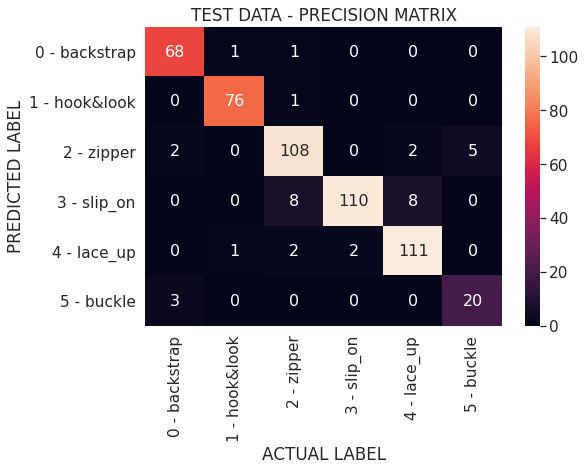

In [ ]:
plot_conf_matrix(df_test.ensemble_prediction,df_test.label,labels,"TEST DATA - PRECISION MATRIX")

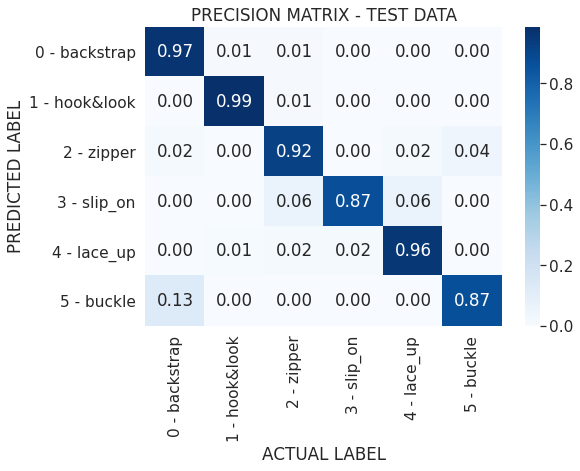

In [ ]:
cnf_matrix = confusion_matrix(df_test.ensemble_prediction, df_test.label)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(8, 5.5))
ax = sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
ax.set_title("PRECISION MATRIX - TEST DATA")
ax.set(xlabel='ACTUAL LABEL', ylabel='PREDICTED LABEL')
plt.show()

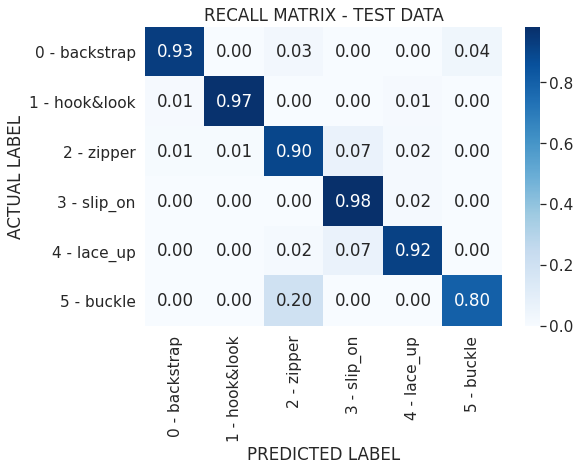

In [ ]:
cnf_matrix = confusion_matrix(df_test.label, df_test.ensemble_prediction)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(8, 5.5))
ax = sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
ax.set_title("RECALL MATRIX - TEST DATA")
ax.set(xlabel='PREDICTED LABEL', ylabel='ACTUAL LABEL')
plt.show()

In [ ]:
print("Test Accuracy score : %.3f" % accuracy_score(df_test.ensemble_prediction,df_test.label))

Test Accuracy score : 0.932


In [ ]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(df_test.ensemble_prediction, df_test.label, weights='quadratic'))

Test Cohen Kappa score: 0.919


In [ ]:
print('Micro Avg F1 = ',f1_score(df_test.label,df_test.ensemble_prediction,average = 'micro'))
print('Macro Avg F1 = ',f1_score(df_test.label,df_test.ensemble_prediction,average = 'macro'))

Micro Avg F1 =  0.9319470699432892
Macro Avg F1 =  0.9229164098990918
